# ProduceFalseColourGeotiffs

**What does this notebook do?** 

This notebooks demonstrates how you can call an external set of python functions into a Jupyter Notebook, rather than loading them all explicitly within the notebook cells. This streamlines the notebook, and makes it a lot easier to read the code. This notebook uses two python files: `DEAPlotting` and `DEADataHandling`, both of which are also available to download. The notebook develops a query and extracts some data using the `DEADataHandling.load_nbart` function. It then plots up a false colour image using `DEAPlotting` and saves it as a Geotiff using the `DEADataHandling` function.

**Inputs** 

This example uses two external functions called `three_band_image` and `load_nbarx`. These functions are available in the `Scripts` folder of the [dea-notebooks Github repository](https://github.com/GeoscienceAustralia/dea-notebooks/tree/master/Scripts). Note that these functions have been developed by DEA users, not the DEA development team, and so are provided without warranty. If you find an error or bug in the functions, please either create an 'Issue' in the Github repository, or fix it yourself and create a 'Pull' request to contribute the updated function back into the repository (See the repository [README](https://github.com/GeoscienceAustralia/dea-notebooks/blob/master/README.rst) for instructions on creating a Pull request).

**Date** May 2018

**Author** Claire Krause

In [1]:
% pylab notebook

from datacube import Datacube

# Import the custom scripts. These can be found in the dea-notebooks repository.
import sys
import os.path
sys.path.append(os.path.expanduser('~/dea-notebooks/Scripts'))
import DEAPlotting
import DEADataHandling

dc = Datacube(app='Geotiff')

Populating the interactive namespace from numpy and matplotlib


Failed to resolve driver datacube.plugins.index::s3aio_index


## Extract some data using our imported function

In [2]:
query = {'lat': (-35.25, -35.35),
         'lon': (149.05, 149.17),
         'time': ('2006-01-01', '2006-03-01')
         }

The `DEADataHandling.load_nbarx` function automatically loads in the `NBART` product, and filters it for cloud, contiguity and saturated pixels. These options can be changed by adding `product='nbar'`, or by setting `filter_pq=False` to the function call.

In [3]:
data, crs, affine = DEADataHandling.load_nbarx(dc, 'ls5', query,
                                               bands_of_interest=['swir1', 'nir', 'green'])

Failed to resolve driver datacube.plugins.io.read::s3aio
Failed to resolve driver datacube.plugins.io.read::s3aio_test


Loading ls5_nbart_albers
Loaded ls5_nbart_albers
Generating mask ls5_pq_albers
Masked ls5_nbart_albers with ls5_pq_albers and filtered terrain


In [4]:
data

<xarray.Dataset>
Dimensions:  (time: 5, x: 492, y: 500)
Coordinates:
  * time     (time) datetime64[ns] 2006-01-25T23:40:21.500000 ...
  * y        (y) float64 -3.953e+06 -3.953e+06 -3.953e+06 -3.953e+06 ...
  * x        (x) float64 1.542e+06 1.542e+06 1.542e+06 1.542e+06 1.542e+06 ...
Data variables:
    swir1    (time, y, x) float64 1.64e+03 1.571e+03 1.537e+03 1.79e+03 ...
    nir      (time, y, x) float64 2.331e+03 2.237e+03 2.403e+03 2.739e+03 ...
    green    (time, y, x) float64 651.0 644.0 840.0 845.0 1.023e+03 ...
Attributes:
    crs:      EPSG:3577
    affine:   | 25.00, 0.00, 1542325.00|\n| 0.00,-25.00,-3953075.00|\n| 0.00,...

## Draw a false colour image using our imported function

<IPython.core.display.Javascript object>


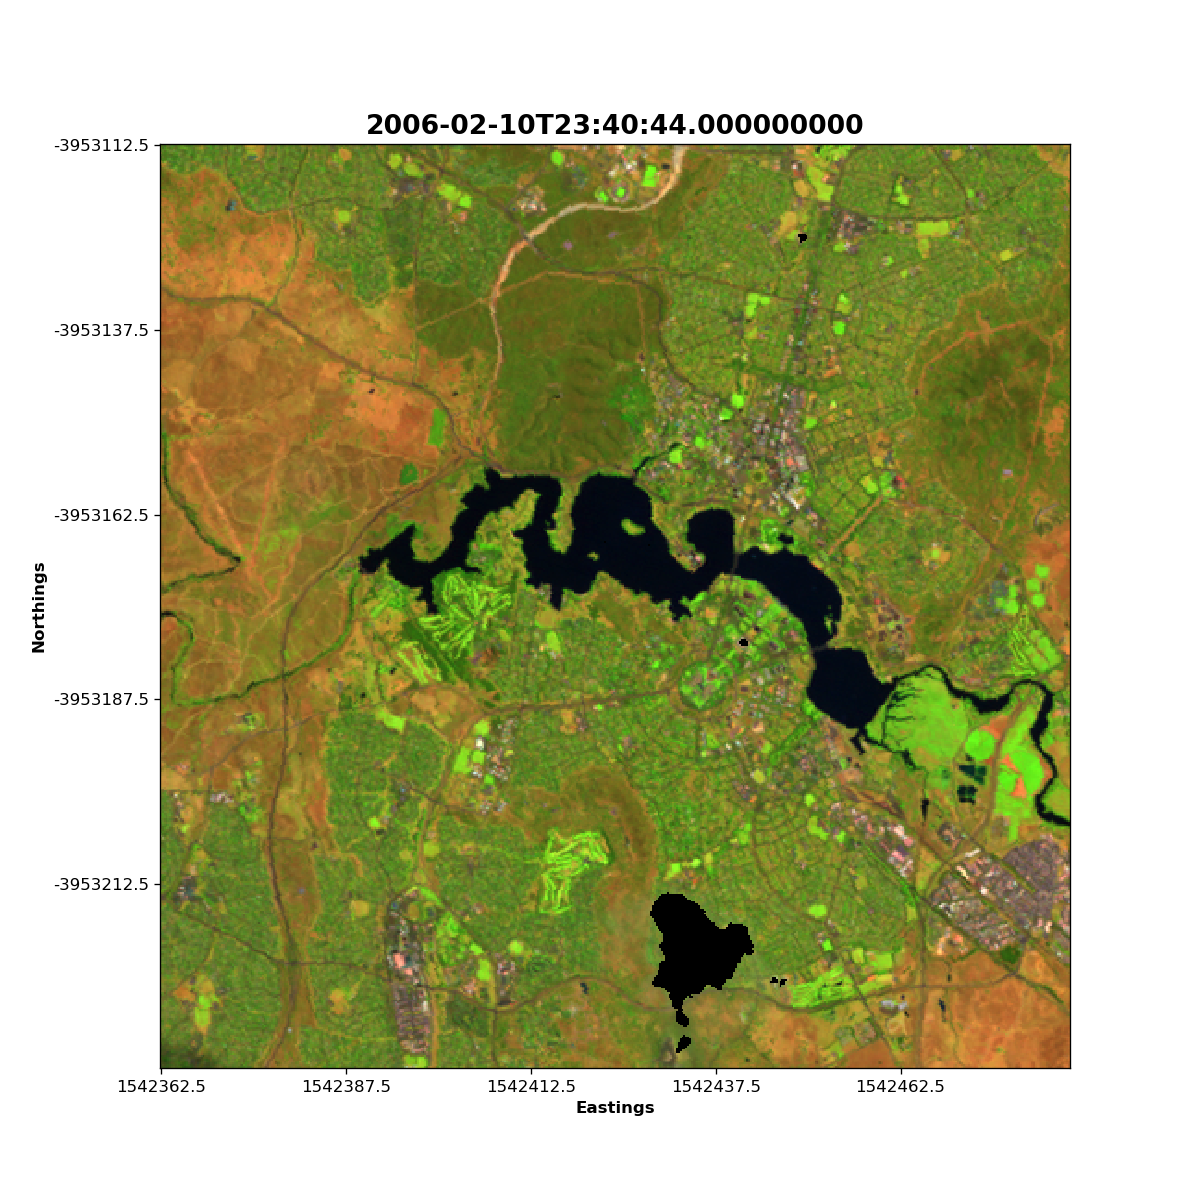

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [5]:
DEAPlotting.three_band_image(data, ['swir1', 'nir', 'green'], time=2);

<div class="alert alert-info">

**Note** There is a cloud in this image that has been filtered out using the pixel quality mask.

</div>

## Export the three bands to Geotiff using our imported function

This function requires the input dataset have no time dimension, only lat and lon. You can achieve this by selecting just the required timestep (`data.isel(time=2)`), or, if the extraction has only returned a single timestep, you can use `data.squeeze()` to remove the empty time dimension.

In [6]:
DEADataHandling.dataset_to_geotiff('Canberra.tif', data.isel(time=2))